In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
big_df = pd.read_csv('big_df_final.csv')

### Standardizing and One-hot Encoding

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer

In [4]:
dfp = big_df.copy().drop('CUST_NUM', axis=1)

df_num = dfp.select_dtypes(exclude='object')
df_cat = dfp.select_dtypes(include='object')

for c in df_num.columns:
    pt = PowerTransformer() # for skewed
    df_num.loc[:, c] = pt.fit_transform(np.array(df_num[c]).reshape(-1, 1))

# one-hot encoding
df_cat = pd.get_dummies(df_cat)
# combine scaled numerical and categorical dummy variables in a dataframe
dfp_combined = pd.concat([df_num, df_cat], axis=1)
# standardize the data to have a mean of ~0 and a variance of 1
dfp_scaled = StandardScaler().fit_transform(dfp_combined)

In [13]:
# categorical_features = dfp.select_dtypes(include=['object']).columns.tolist()
# numerical_features = dfp.select_dtypes(include=['float64']).columns.tolist()

# scaler = StandardScaler()
# encoder = OneHotEncoder()

# dfp_train = preprocessor.fit_transform(dfp_train)
# dfp_test = preprocessor.transform(dfp_test)

# print('test')

# # Restore column names
# ohe_categories = preprocessor.named_transformers_['onehotencoder'].categories_
# ohe_feature_names = [f"{col}_{val}" for col, vals in zip(categorical_features, ohe_categories) for val in vals]
# new_feature_names = numerical_features + ohe_feature_names

# print('test2')

# X_train_fix = pd.DataFrame(X_train.toarray(), columns=new_feature_names)
# X_test_fix = pd.DataFrame(X_test.toarray(), columns=new_feature_names)

### Feature Selection (PCA)
Principal component analysis, or PCA, is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

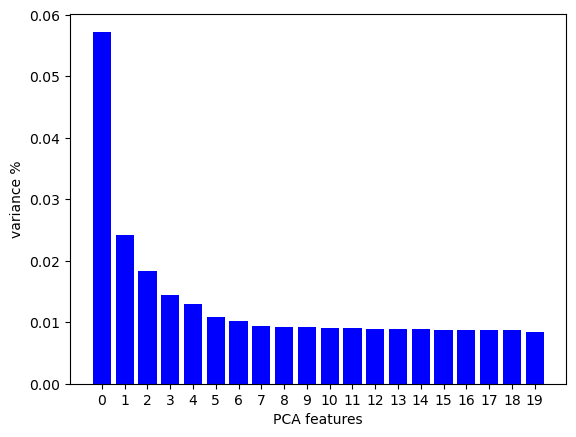

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# principal components
pca = PCA(n_components=20)
res_pca = pca.fit_transform(dfp_scaled)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

In [6]:
dfp_pca = pd.DataFrame(res_pca)

# K-Prototypes
Uses both K-means and K-modes to handle numerical and categorical data respectively.

### Data processing

In [7]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder

In [8]:
dfp = big_df.copy().drop('CUST_NUM', axis=1)

df_num = dfp.select_dtypes(exclude='object')
df_cat = dfp.select_dtypes(include='object')

for c in df_num.columns:
    df_num.loc[:, c] = PowerTransformer().fit_transform(np.array(df_num[c]).reshape(-1, 1))
    df_num.loc[:, c] = StandardScaler().fit_transform(np.array(df_num[c]).reshape(-1, 1))

for c in df_cat.columns:
    df_cat.loc[:, c] = LabelEncoder().fit_transform(np.array(df_cat[c]).reshape(-1, 1))

# combine in a dataframe
dfp_combined = pd.concat([df_num, df_cat], axis=1)

In [9]:
df_cat_cols = [dfp.columns.get_loc(c) for c in df_cat]
df_num_cols = [dfp.columns.get_loc(c) for c in df_num]

### Finding optimum cluster number

In [10]:
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import PowerTransformer, StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

### Gamma = 0.1

In [11]:
# Assuming dfp_combined is already prepared

# Define a custom scoring function for KPrototypes (negative mean squared distance)
def neg_mean_squared_distance(estimator, X, categorical):
    cost = estimator.cost_
    return -cost

# Initialize the KPrototypes model
kproto = KPrototypes(verbose=1)

best_cost = float('inf')
best_n_clusters = -1
best_gamma = -1

# Calculate costs during hyperparameter tuning
costs = []  # Add this line to calculate the costs
n_clusters = []

# Hyperparameter tuning
for n_clusters_val in range(3, 8):
    for gamma in [0.1]:
        print(f"Trying n_clusters={n_clusters_val}, gamma={gamma}")

        # Fit the KPrototypes model
        kproto = KPrototypes(n_clusters=n_clusters_val, gamma=gamma, verbose=1)
        clusters_val = kproto.fit_predict(dfp_combined, categorical=df_cat_cols)
        cost_val = kproto.cost_

        print(f"Cost for this configuration: {cost_val}")

        # Update best parameters if this configuration has a lower cost
        if cost_val < best_cost:
            best_cost = cost_val
            best_n_clusters = n_clusters_val
            best_gamma = gamma

        # Append cost and n_clusters for plotting the elbow
        costs.append(cost_val)
        n_clusters.append(n_clusters_val)

# print("Best number of clusters:", best_n_clusters)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Trying n_clusters=3, gamma=0.1
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 7083, ncost: 941126.3616466072
Run: 1, iteration: 2/100, moves: 68, ncost: 941105.0716836253
Run: 1, iteration: 3/100, moves: 0, ncost: 941105.0716836253
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 2836, ncost: 941119.4757001561
Run: 2, iteration: 2/100, moves: 53, ncost: 941105.0716836255
Run: 2, iteration: 3/100, moves: 0, ncost: 941105.0716836255
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 967, ncost: 1266765.4360959558
Run: 3, iteration: 2/100, moves: 74, ncost: 1266474.1304462857
Run: 3, iteration: 3/100, moves: 1, ncost: 1266474.0955829294
Run: 3, iterat

Run: 4, iteration: 5/100, moves: 0, ncost: 540929.2997423414
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 6625, ncost: 704352.3155926692
Run: 5, iteration: 2/100, moves: 414, ncost: 703375.7408519236
Run: 5, iteration: 3/100, moves: 0, ncost: 703375.7408519236
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 3587, ncost: 642978.1026828944
Run: 6, iteration: 2/100, moves: 528, ncost: 640129.9242999761
Run: 6, iteration: 3/100, moves: 51, ncost: 640077.3744719402
Run: 6, iteration: 4/100, moves: 1, ncost: 640077.2208537037
Run: 6, iteration: 5/100, moves: 0, ncost: 640077.2208537037
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 4059, ncost: 849068.3388870957
Run: 7, iteration: 2/100, moves: 2302, ncost: 847896.7032452727
Run: 7, iteration: 3/100, moves: 2790, ncost: 844816.7192433198
Run: 7, 

Run: 2, iteration: 14/100, moves: 0, ncost: 447642.99610037083
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 1841, ncost: 819782.7252397946
Run: 3, iteration: 2/100, moves: 3126, ncost: 810707.0995642391
Run: 3, iteration: 3/100, moves: 640, ncost: 810434.8687597394
Run: 3, iteration: 4/100, moves: 280, ncost: 810385.1134385829
Run: 3, iteration: 5/100, moves: 60, ncost: 810382.3460387199
Run: 3, iteration: 6/100, moves: 2, ncost: 810382.3403437743
Run: 3, iteration: 7/100, moves: 0, ncost: 810382.3403437743
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 3863, ncost: 662573.2269035613
Run: 4, iteration: 2/100, moves: 151, ncost: 662229.9797256762
Run: 4, iteration: 3/100, moves: 34, ncost: 661985.2510101091
Run: 4, iteration: 4/100, moves: 15, ncost: 661926.5289796338
Run: 4, iteration: 5/100, moves: 28, ncost: 661742.9212100259
Run: 4, iteration: 6/100, 

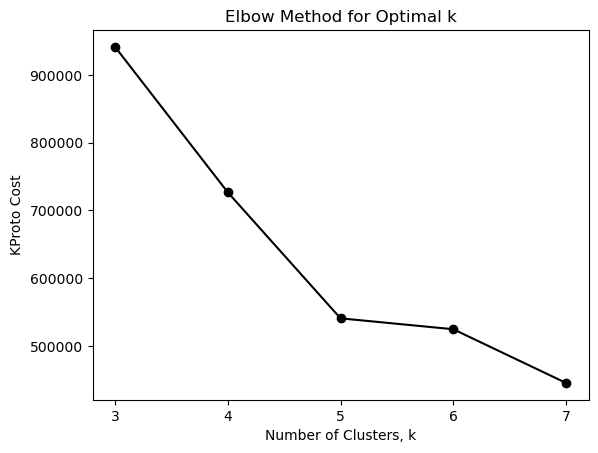

In [12]:
# Visualize the elbow test
plt.plot(n_clusters, costs, '-o', color='black')
plt.xlabel('Number of Clusters, k')
plt.ylabel('KProto Cost')
plt.title('Elbow Method for Optimal k')
plt.xticks(n_clusters)
plt.show()

In [13]:
# Find the optimal number of clusters using the knee point
costs_knee = KneeLocator(n_clusters, costs, S=0.1, curve="convex", direction="decreasing")
K_cost = costs_knee.elbow

print("Elbow at k =", f'{K_cost:.0f} clusters')

Elbow at k = 5 clusters


In [14]:
# Fit the best model
# best_kproto = KPrototypes(n_clusters=best_n_clusters, gamma=best_gamma, verbose=1)
best_kproto = KPrototypes(n_clusters=5, gamma=best_gamma, verbose=1)
clusters = best_kproto.fit_predict(dfp_combined, categorical=df_cat_cols)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 8570, ncost: 693263.6940255103
Run: 1, iteration: 2/100, moves: 257, ncost: 692787.8202633568
Run: 1, iteration: 3/100, moves: 2, ncost: 692787.7649981009
Run: 1, iteration: 4/100, moves: 0, ncost: 692787.7649981009
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 6990, ncost: 680185.7682799519
Run: 2, iteration: 2/100, moves: 139, ncost: 679816.2710885943
Run: 2, iteration: 3/100, moves: 0, ncost: 679816.2710885943
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 7437, ncost: 844619.7885832923
Run: 3, iteration: 2/100, moves: 188, ncost: 844060.3936457402
Run: 3

### Create model

In [15]:
# Save the results to a CSV file
dfp2 = big_df.copy()
dfp2.insert(0, 'CLUSTER', clusters)

In [16]:
dfp2.head()

,CLUSTER,Unnamed: 0,CUST_NUM,PROVINCE,REGION,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,...,DIGITAL_CHANNEL,DIGITAL_TRAN_TYPE,INCOMING_MEAN,INCOMING_COUNT,INCOMING_BPI_ACCT_TYPE,INCOMING_SRC_BANK_NAME,OUTGOING_MEAN,OUTGOING_COUNT,OUTGOING_CHANNEL,OUTGOING_RCV_BANK_NAME
0,2,0,85.229103,SOUTH COTABATO,REGION XII (SOCCSKSARGEN),NO_DATA,32.0,1.250000,N,TRADITIONAL,...,NO_DATA,NO_DATA,4999.391138,3.0,SA,DOG,17999.470331,1.0,MOBILE,CHEETAH
1,1,1,96.457244,LANAO DEL NORTE,REGION X (NORTHERN MINDANAO),NO_DATA,34.0,0.083333,N,TRADITIONAL,...,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA
2,3,2,107.814656,NEGROS OCCIDENTAL,REGION VI (WESTERN VISAYAS),MID,44.0,3.833333,N,TRADITIONAL,...,WEB,E-WALLET,8874.047476,4.0,SA,HUMAN,0.000000,0.0,NO_DATA,NO_DATA
3,4,3,169.127171,NEGROS OCCIDENTAL,REGION VI (WESTERN VISAYAS),LOW,60.0,5.083333,Y,NO_DATA,...,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA
4,3,4,185.854782,ZAMBOANGA DEL NORTE,REGION IX (ZAMBOANGA PENINSULA),MID,32.0,7.666667,N,TRADITIONAL,...,NO_DATA,NO_DATA,8454.403261,26.0,SA,HUMAN,0.000000,0.0,NO_DATA,NO_DATA


In [17]:
dfp2.to_csv('dfp_kprototypes_0.1.csv', index=False)

### Visualize

In [18]:
# Visualize the results using T-SNE
tsne = TSNE(n_components=2)
transformed = tsne.fit_transform(dfp_combined)

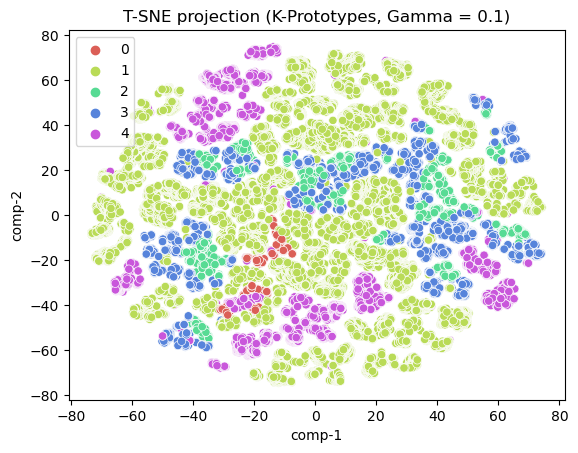

In [19]:
import seaborn as sns

dfp_kproto = pd.DataFrame()
dfp_kproto['CLUSTER'] = clusters  # Use the clusters from the best model
dfp_kproto['comp-1'] = transformed[:,0]
dfp_kproto['comp-2'] = transformed[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=dfp_kproto.CLUSTER.tolist(),
                palette=sns.color_palette('hls', len(np.unique(clusters))),
                data=dfp_kproto).set(title="T-SNE projection (K-Prototypes, Gamma = 0.1)")

plt.show()

In [20]:
plt.savefig('T-SNE_K-Prototypes.png')

<Figure size 640x480 with 0 Axes>

### Gamma = 0.5

In [11]:
# Assuming dfp_combined is already prepared

# Define a custom scoring function for KPrototypes (negative mean squared distance)
def neg_mean_squared_distance(estimator, X, categorical):
    cost = estimator.cost_
    return -cost

# Initialize the KPrototypes model
kproto = KPrototypes(verbose=1)

best_cost = float('inf')
best_n_clusters = -1
best_gamma = -1

# Calculate costs during hyperparameter tuning
costs = []  # Add this line to calculate the costs
n_clusters = []

# Hyperparameter tuning
for n_clusters_val in range(3, 8):
    for gamma in [0.5]:
        print(f"Trying n_clusters={n_clusters_val}, gamma={gamma}")

        # Fit the KPrototypes model
        kproto = KPrototypes(n_clusters=n_clusters_val, gamma=gamma, verbose=1)
        clusters_val = kproto.fit_predict(dfp_combined, categorical=df_cat_cols)
        cost_val = kproto.cost_

        print(f"Cost for this configuration: {cost_val}")

        # Update best parameters if this configuration has a lower cost
        if cost_val < best_cost:
            best_cost = cost_val
            best_n_clusters = n_clusters_val
            best_gamma = gamma

        # Append cost and n_clusters for plotting the elbow
        costs.append(cost_val)
        n_clusters.append(n_clusters_val)

#print("Best number of clusters:", best_n_clusters)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Trying n_clusters=3, gamma=0.5
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 850, ncost: 1394471.9009636666
Run: 1, iteration: 2/100, moves: 33, ncost: 1394445.757559031
Run: 1, iteration: 3/100, moves: 1, ncost: 1394445.6955829465
Run: 1, iteration: 4/100, moves: 0, ncost: 1394445.6955829465
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 479, ncost: 1382161.8933580504
Run: 2, iteration: 2/100, moves: 5, ncost: 1382161.683194879
Run: 2, iteration: 3/100, moves: 0, ncost: 1382161.683194879
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 496, ncost: 1526469.6415821046
Run: 3, iteration: 2/100, moves: 6, ncost: 1526466.8067730737
Run: 3, iterati

Run: 3, iteration: 5/100, moves: 21, ncost: 831846.9280127445
Run: 3, iteration: 6/100, moves: 24, ncost: 831846.4010076461
Run: 3, iteration: 7/100, moves: 43, ncost: 831845.4509360746
Run: 3, iteration: 8/100, moves: 29, ncost: 831844.8314350205
Run: 3, iteration: 9/100, moves: 14, ncost: 831844.6732793859
Run: 3, iteration: 10/100, moves: 5, ncost: 831844.649831767
Run: 3, iteration: 11/100, moves: 0, ncost: 831844.649831767
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 2463, ncost: 807740.2291930077
Run: 4, iteration: 2/100, moves: 143, ncost: 807644.9763126185
Run: 4, iteration: 3/100, moves: 32, ncost: 807635.2213530346
Run: 4, iteration: 4/100, moves: 1, ncost: 807635.2052443405
Run: 4, iteration: 5/100, moves: 0, ncost: 807635.2052443405
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 5814, ncost: 820865.9679572541
Run: 5, iteration: 2/100, moves: 

Starting iterations...
Run: 2, iteration: 1/100, moves: 2382, ncost: 799362.4171150252
Run: 2, iteration: 2/100, moves: 2244, ncost: 791772.8468939636
Run: 2, iteration: 3/100, moves: 1865, ncost: 789413.7131911643
Run: 2, iteration: 4/100, moves: 376, ncost: 789325.5908474139
Run: 2, iteration: 5/100, moves: 162, ncost: 789306.6018027633
Run: 2, iteration: 6/100, moves: 14, ncost: 789306.4339625831
Run: 2, iteration: 7/100, moves: 1, ncost: 789306.4310366941
Run: 2, iteration: 8/100, moves: 1, ncost: 789306.4298293839
Run: 2, iteration: 9/100, moves: 0, ncost: 789306.4298293839
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 20032, ncost: 774154.4949324353
Run: 3, iteration: 2/100, moves: 588, ncost: 773778.155093431
Run: 3, iteration: 3/100, moves: 204, ncost: 773748.2462811833
Run: 3, iteration: 4/100, moves: 43, ncost: 773746.7104710785
Run: 3, iteration: 5/100,

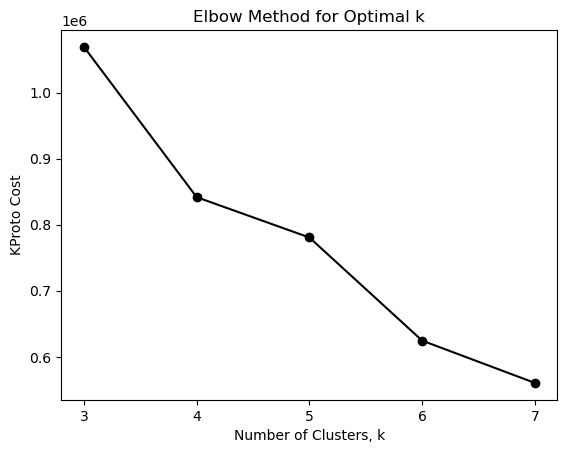

In [12]:
# Visualize the elbow test
plt.plot(n_clusters, costs, '-o', color='black')
plt.xlabel('Number of Clusters, k')
plt.ylabel('KProto Cost')
plt.title('Elbow Method for Optimal k')
plt.xticks(n_clusters)
plt.show()

In [13]:
# Find the optimal number of clusters using the knee point
costs_knee = KneeLocator(n_clusters, costs, S=0.1, curve="convex", direction="decreasing")
K_cost = costs_knee.elbow

print("Elbow at k =", f'{K_cost:.0f} clusters')

Elbow at k = 4 clusters


In [16]:
## Select relevant columns (categorical and numerical)
categorical_columns = ['PROVINCE', 'REGION', 'EDUCATION', 'BUSINESS_OWNER', 'DIGITAL_FLAG', 'INCOME_SOURCE', 'GENDER', 'MARITAL_STATUS', 'CREDIT_CHANNEL', 'CREDIT_MERCH_GROUP', 'DEBIT_CHANNEL', 'DIGITAL_CHANNEL', 'DIGITAL_TRAN_TYPE', 'INCOMING_BPI_ACCT_TYPE', 'INCOMING_SRC_BANK_NAME', 'OUTGOING_CHANNEL', 'OUTGOING_RCV_BANK_NAME']
numerical_columns = ['AGE', 'TENURE', 'CREDIT_MEAN', 'CREDIT_COUNT', 'DEBIT_MEAN', 'DEBIT_COUNT', 'DIGITAL_MEAN', 'DIGITAL_COUNT', 'INCOMING_MEAN', 'INCOMING_COUNT', 'OUTGOING_MEAN', 'OUTGOING_COUNT']

# Encode categorical columns using LabelEncoder
encoder = LabelEncoder()
dfp_combined_encoded = dfp_combined.copy()
dfp_combined_encoded[categorical_columns] = dfp_combined[categorical_columns].apply(encoder.fit_transform)

# Combine encoded categorical columns with numerical columns
data_matrix = np.hstack((dfp_combined_encoded[categorical_columns].values, dfp_combined[numerical_columns].values))

# Define the number of clusters (k)
n_clusters = 4

# Fit k-prototypes clustering
kproto = KPrototypes(n_clusters=n_clusters, init='Cao', verbose=2)
clusters = kproto.fit_predict(data_matrix, categorical=list(range(len(categorical_columns))))

# Compute silhouette score
silhouette_avg = silhouette_score(data_matrix, clusters, metric='euclidean')
print(f"Silhouette Score: {silhouette_avg}")

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 10539, ncost: 381049.51580208895
Run: 1, iteration: 2/100, moves: 647, ncost: 380513.3750822441
Run: 1, iteration: 3/100, moves: 77, ncost: 380506.16712922114
Run: 1, iteration: 4/100, moves: 22, ncost: 380505.10213811375
Run: 1, iteration: 5/100, moves: 10, ncost: 380504.7626805766
Run: 1, iteration: 6/100, moves: 6, ncost: 380504.707401008
Run: 1, iteration: 7/100, moves: 0, ncost: 380504.707401008
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 21207, ncost: 359591.37746596773
Run: 2, iteration: 2/100, moves: 2017, ncost: 355808.63640549284
Run: 2, iteration: 3/100, moves: 483, ncost: 355359.10544596554
Run: 2, iteration: 4/100, moves: 454, ncost: 354857.500256794
Run: 2, iteration: 5/100, moves: 166, ncost: 354788.2079794411
Run: 2,

Run: 10, iteration: 16/100, moves: 0, ncost: 411588.83829085843
Best run was number 2
Silhouette Score: 0.024299739632835524


In [37]:
# Fit the best model
# best_kproto = KPrototypes(n_clusters=best_n_clusters, gamma=best_gamma, verbose=1)
best_kproto = KPrototypes(n_clusters=4, gamma=best_gamma, verbose=1)
clusters = best_kproto.fit_predict(dfp_combined, categorical=df_cat_cols)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2550, ncost: 1035348.3072681072
Run: 1, iteration: 2/100, moves: 465, ncost: 1024841.4179810168
Run: 1, iteration: 3/100, moves: 134, ncost: 1024465.0191050633
Run: 1, iteration: 4/100, moves: 8, ncost: 1024463.5356261537
Run: 1, iteration: 5/100, moves: 0, ncost: 1024463.5356261537
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 9142, ncost: 1043289.7046378532
Run: 2, iteration: 2/100, moves: 593, ncost: 1043126.883096025
Run: 2, iteration: 3/100, moves: 104, ncost: 1043118.7396453052
Run: 2, iteration: 4/100, moves: 117, ncost: 1043103.3194111289
Run: 2, iteration: 5/100, moves: 163, ncost: 1043076.5393164704
Run: 2, iteration: 6/100, moves: 13, ncost: 1043076.2432183455
Run: 2, iteration: 7/100, moves: 0, ncost: 1043076.2432183455
In

### Create model

In [38]:
dfp3 = big_df.copy()
dfp3.insert(0, 'CLUSTER', clusters)

In [39]:
dfp3.head()

,CLUSTER,Unnamed: 0,CUST_NUM,PROVINCE,REGION,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,...,DIGITAL_CHANNEL,DIGITAL_TRAN_TYPE,INCOMING_MEAN,INCOMING_COUNT,INCOMING_BPI_ACCT_TYPE,INCOMING_SRC_BANK_NAME,OUTGOING_MEAN,OUTGOING_COUNT,OUTGOING_CHANNEL,OUTGOING_RCV_BANK_NAME
0,3,0,85.229103,SOUTH COTABATO,REGION XII (SOCCSKSARGEN),NO_DATA,32.0,1.250000,N,TRADITIONAL,...,NO_DATA,NO_DATA,4999.391138,3.0,SA,DOG,17999.470331,1.0,MOBILE,CHEETAH
1,2,1,96.457244,LANAO DEL NORTE,REGION X (NORTHERN MINDANAO),NO_DATA,34.0,0.083333,N,TRADITIONAL,...,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA
2,1,2,107.814656,NEGROS OCCIDENTAL,REGION VI (WESTERN VISAYAS),MID,44.0,3.833333,N,TRADITIONAL,...,WEB,E-WALLET,8874.047476,4.0,SA,HUMAN,0.000000,0.0,NO_DATA,NO_DATA
3,0,3,169.127171,NEGROS OCCIDENTAL,REGION VI (WESTERN VISAYAS),LOW,60.0,5.083333,Y,NO_DATA,...,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA
4,1,4,185.854782,ZAMBOANGA DEL NORTE,REGION IX (ZAMBOANGA PENINSULA),MID,32.0,7.666667,N,TRADITIONAL,...,NO_DATA,NO_DATA,8454.403261,26.0,SA,HUMAN,0.000000,0.0,NO_DATA,NO_DATA


In [40]:
dfp3.to_csv('dfp_kprototypes_0.5.csv', index=False)

### Visualize

In [41]:
# Visualize the results using T-SNE
tsne = TSNE(n_components=2)
transformed = tsne.fit_transform(dfp_combined)

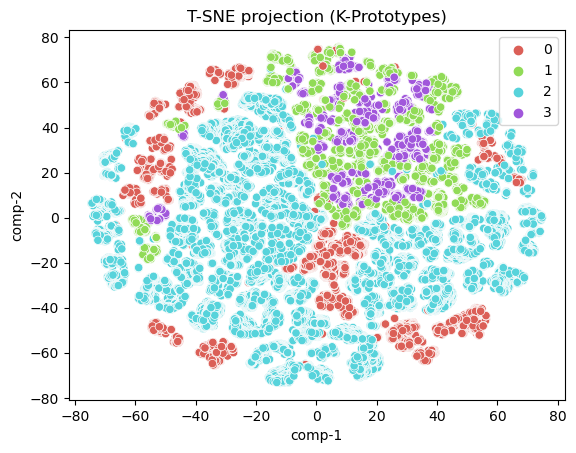

In [43]:
import seaborn as sns

dfp_kproto = pd.DataFrame()
dfp_kproto['CLUSTER'] = clusters  # Use the clusters from the best model
dfp_kproto['comp-1'] = transformed[:,0]
dfp_kproto['comp-2'] = transformed[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=dfp_kproto.CLUSTER.tolist(),
                palette=sns.color_palette('hls', len(np.unique(clusters))),
                data=dfp_kproto).set(title="T-SNE projection (K-Prototypes)")

plt.show()

### Gamma = 1

In [20]:
# Assuming dfp_combined is already prepared

# Define a custom scoring function for KPrototypes (negative mean squared distance)
def neg_mean_squared_distance(estimator, X, categorical):
    cost = estimator.cost_
    return -cost

# Initialize the KPrototypes model
kproto = KPrototypes(verbose=1)

best_cost = float('inf')
best_n_clusters = -1
best_gamma = -1

# Calculate costs during hyperparameter tuning
costs = []  # Add this line to calculate the costs
n_clusters = []

# Hyperparameter tuning
for n_clusters_val in range(3, 8):
    for gamma in [1]:
        print(f"Trying n_clusters={n_clusters_val}, gamma={gamma}")

        # Fit the KPrototypes model
        kproto = KPrototypes(n_clusters=n_clusters_val, gamma=gamma, verbose=1)
        clusters_val = kproto.fit_predict(dfp_combined, categorical=df_cat_cols)
        cost_val = kproto.cost_

        print(f"Cost for this configuration: {cost_val}")

        # Update best parameters if this configuration has a lower cost
        if cost_val < best_cost:
            best_cost = cost_val
            best_n_clusters = n_clusters_val
            best_gamma = gamma

        # Append cost and n_clusters for plotting the elbow
        costs.append(cost_val)
        n_clusters.append(n_clusters_val)

#print("Best number of clusters:", best_n_clusters)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Trying n_clusters=3, gamma=1
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3338, ncost: 1229193.3704192515
Run: 1, iteration: 2/100, moves: 62, ncost: 1229173.4716836181
Run: 1, iteration: 3/100, moves: 0, ncost: 1229173.4716836181
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 25840, ncost: 1265421.4269509986
Run: 2, iteration: 2/100, moves: 2716, ncost: 1229180.130080376
Run: 2, iteration: 3/100, moves: 35, ncost: 1229173.4716836174
Run: 2, iteration: 4/100, moves: 0, ncost: 1229173.4716836174
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 10043, ncost: 1230245.7911498505
Run: 3, iteration: 2/100, moves: 289, ncost: 1229173.4716836177
Run:

Run: 5, iteration: 4/100, moves: 0, ncost: 1124649.968433715
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 14354, ncost: 1116696.0801934013
Run: 6, iteration: 2/100, moves: 13199, ncost: 832749.3234933955
Run: 6, iteration: 3/100, moves: 788, ncost: 828630.6581181462
Run: 6, iteration: 4/100, moves: 5, ncost: 828629.9209491509
Run: 6, iteration: 5/100, moves: 0, ncost: 828629.9209491509
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 7, iteration: 1/100, moves: 2000, ncost: 1400824.2348319544
Run: 7, iteration: 2/100, moves: 4542, ncost: 1285227.5509213493
Run: 7, iteration: 3/100, moves: 458, ncost: 1282216.6733598139
Run: 7, iteration: 4/100, moves: 112, ncost: 1281074.065856431
Run: 7, iteration: 5/100, moves: 49, ncost: 1280908.8244606745
Run: 7, iteration: 6/100, moves: 5, ncost: 1280907.4359573834
Run: 7, iteration: 7/100, moves: 0, ncost: 1280907.4359573834
Init: initializing 

Run: 3, iteration: 6/100, moves: 0, ncost: 902622.5752835367
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 2879, ncost: 913526.4673809165
Run: 4, iteration: 2/100, moves: 3110, ncost: 906891.0453666396
Run: 4, iteration: 3/100, moves: 892, ncost: 906233.9620241019
Run: 4, iteration: 4/100, moves: 246, ncost: 906198.3160959609
Run: 4, iteration: 5/100, moves: 46, ncost: 906196.6929413746
Run: 4, iteration: 6/100, moves: 2, ncost: 906196.6820251065
Run: 4, iteration: 7/100, moves: 0, ncost: 906196.6820251065
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 4662, ncost: 942301.7608721048
Run: 5, iteration: 2/100, moves: 1620, ncost: 934952.5860802177
Run: 5, iteration: 3/100, moves: 2701, ncost: 930502.7537421122
Run: 5, iteration: 4/100, moves: 740, ncost: 929922.2512855516
Run: 5, iteration: 5/100, moves: 278, ncost: 929873.1165316268
Run: 5, iteration: 6/10

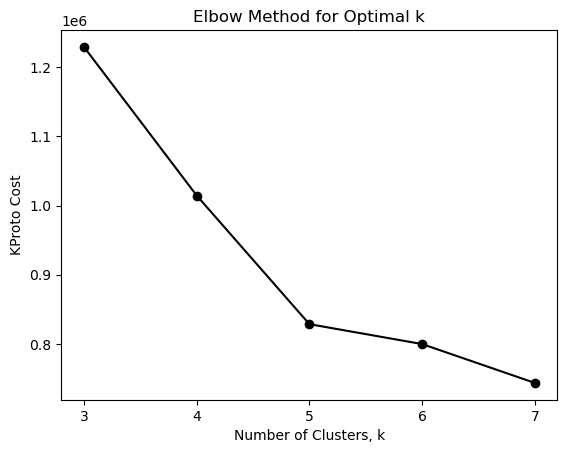

In [21]:
# Visualize the elbow test
plt.plot(n_clusters, costs, '-o', color='black')
plt.xlabel('Number of Clusters, k')
plt.ylabel('KProto Cost')
plt.title('Elbow Method for Optimal k')
plt.xticks(n_clusters)
plt.show()

In [22]:
# Find the optimal number of clusters using the knee point
costs_knee = KneeLocator(n_clusters, costs, S=0.1, curve="convex", direction="decreasing")
K_cost = costs_knee.elbow

print("Elbow at k =", f'{K_cost:.0f} clusters')

Elbow at k = 5 clusters


In [26]:
# Fit the best model
best_kproto = KPrototypes(n_clusters=5, gamma=best_gamma, verbose=1)
clusters = best_kproto.fit_predict(dfp_combined, categorical=df_cat_cols)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 984, ncost: 991102.2509341834
Run: 1, iteration: 2/100, moves: 1, ncost: 991102.1765235164
Run: 1, iteration: 3/100, moves: 0, ncost: 991102.1765235164
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 3544, ncost: 987661.2649821377
Run: 2, iteration: 2/100, moves: 436, ncost: 983460.2062945204
Run: 2, iteration: 3/100, moves: 5, ncost: 983459.8844668671
Run: 2, iteration: 4/100, moves: 0, ncost: 983459.8844668671
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 8427, ncost: 1145321.2502591982
Run: 3, iteration: 2/100, moves: 647, ncost: 1143075.03075868
Run: 3, iteration: 3/100, moves: 3, ncost: 1143073.434061639
Run: 3, iteration: 4/100, moves: 0, ncost: 1143073.434061639
I

### Create model

In [27]:
dfp4 = big_df.copy()
dfp4.insert(0, 'CLUSTER', clusters)

In [28]:
dfp4.head()

,CLUSTER,Unnamed: 0,CUST_NUM,PROVINCE,REGION,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,...,DIGITAL_CHANNEL,DIGITAL_TRAN_TYPE,INCOMING_MEAN,INCOMING_COUNT,INCOMING_BPI_ACCT_TYPE,INCOMING_SRC_BANK_NAME,OUTGOING_MEAN,OUTGOING_COUNT,OUTGOING_CHANNEL,OUTGOING_RCV_BANK_NAME
0,1,0,85.229103,SOUTH COTABATO,REGION XII (SOCCSKSARGEN),NO_DATA,32.0,1.250000,N,TRADITIONAL,...,NO_DATA,NO_DATA,4999.391138,3.0,SA,DOG,17999.470331,1.0,MOBILE,CHEETAH
1,0,1,96.457244,LANAO DEL NORTE,REGION X (NORTHERN MINDANAO),NO_DATA,34.0,0.083333,N,TRADITIONAL,...,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA
2,1,2,107.814656,NEGROS OCCIDENTAL,REGION VI (WESTERN VISAYAS),MID,44.0,3.833333,N,TRADITIONAL,...,WEB,E-WALLET,8874.047476,4.0,SA,HUMAN,0.000000,0.0,NO_DATA,NO_DATA
3,2,3,169.127171,NEGROS OCCIDENTAL,REGION VI (WESTERN VISAYAS),LOW,60.0,5.083333,Y,NO_DATA,...,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA
4,1,4,185.854782,ZAMBOANGA DEL NORTE,REGION IX (ZAMBOANGA PENINSULA),MID,32.0,7.666667,N,TRADITIONAL,...,NO_DATA,NO_DATA,8454.403261,26.0,SA,HUMAN,0.000000,0.0,NO_DATA,NO_DATA


In [30]:
dfp4.to_csv('dfp_kprototypes_1.csv', index=False)

### Visualize

In [32]:
# Visualize the results using T-SNE
tsne = TSNE(n_components=2)
transformed = tsne.fit_transform(dfp_combined)

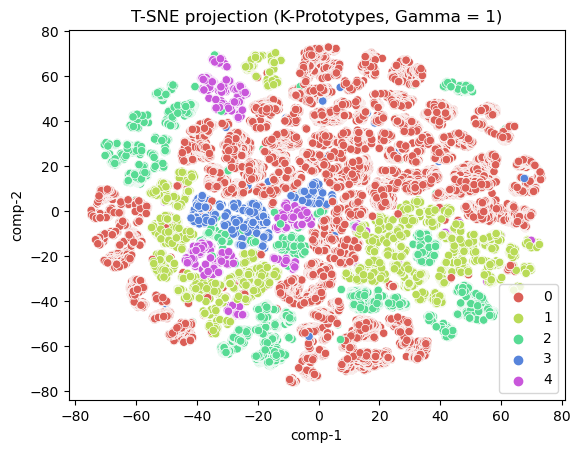

In [33]:
import seaborn as sns

dfp_kproto = pd.DataFrame()
dfp_kproto['CLUSTER'] = clusters  # Use the clusters from the best model
dfp_kproto['comp-1'] = transformed[:,0]
dfp_kproto['comp-2'] = transformed[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=dfp_kproto.CLUSTER.tolist(),
                palette=sns.color_palette('hls', len(np.unique(clusters))),
                data=dfp_kproto).set(title="T-SNE projection (K-Prototypes, Gamma = 1)")

plt.show()